In [2]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Check point part:1

## Data Cleaning

#### The data is very much unstructured and will not be able to read them into a table. We will lookup later to see if this info needs to be converted to structred format.

In [3]:
# Reading compaines.csv, changing the encoding type because of special characters and then solving the multiple encoding issue.

companies = pd.read_csv(r'C:\Users\hp\companies.csv', encoding='ISO-8859-1',)
companies.name = companies.name.str.encode('ISO-8859-1').str.decode('ascii' , 'ignore')
companies.permalink = companies.permalink.str.encode('ISO-8859-1').str.decode('ascii', 'ignore')

In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
# Reading rounds2.csv, changing the encoding type because of special characters and then solving the multiple encoding issue.

rounds2 = pd.read_csv(r'C:\Users\hp\rounds2.csv' , encoding= 'ISO-8859-1')
rounds2.company_permalink = rounds2.company_permalink.str.encode('ISO-8859-1').str.decode('ascii','ignore')

In [6]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


#### Shape of the data files

In [7]:
companies.shape


(66368, 10)

In [8]:
rounds2.shape

(114949, 6)

#### Getting the Columns Names from the Compaines and rounds2

In [9]:
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [10]:
rounds2.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

### Table 1.1: Understand the Data Set 

     ---> How many unique companies are present in rounds2?

In [11]:
# It is observed that the company_permalink is case sensitive in the source data, normalize and get unique count

rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

print(len(rounds2['company_permalink'].unique()))

66368


    ----> How many unique companies are present in the companies file?

In [12]:
# It is observed that the permalink is case sensitive in the source data, normalize and get unique count


companies['permalink'] = companies ['permalink'].str.lower()

print(len(companies['permalink'].unique()))

66368


    ----> In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.

     Ans:
     Permalink can be used as unique key , because in the table description it is Unique ID of company.

    ----> Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.
    Ans: N

In [13]:
set(rounds2['company_permalink'].unique()).difference(set(companies['permalink'].unique()))

set()

#### Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame.
#### Name the merged frame master_frame. How many observations are present in master_frame ?

In [14]:
master_frame = pd.merge(rounds2, companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink')

len(master_frame.index)

114949

In [15]:
# total entire in the merged table

master_frame.shape

(114949, 16)

In [16]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114949 non-null  object 
 7   name                     114948 non-null  object 
 8   homepage_url             108815 non-null  object 
 9   category_list            111539 non-null  object 
 10  status                   114949 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

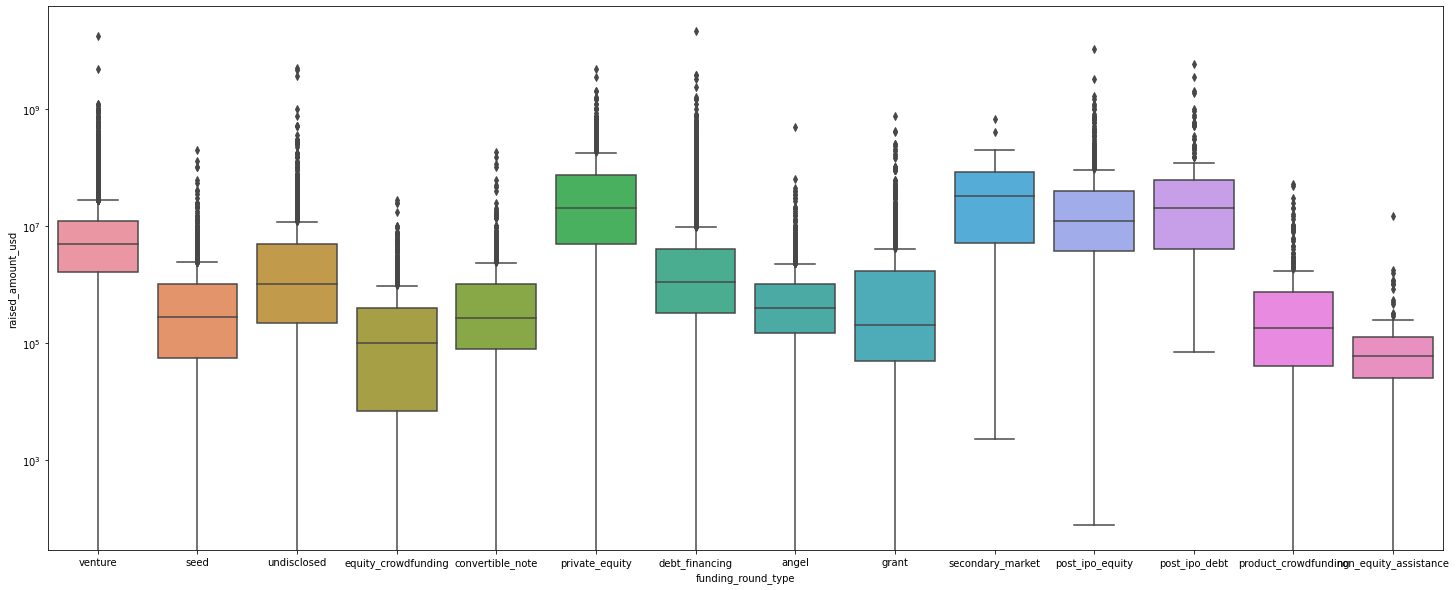

In [17]:
# boxplot of a variable across various funding categories

plt.figure(figsize=(25, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

### Cleaning the data (master_frame)

     >> Inspecting the Null & NaN values
     >> Dropping unnecessary rows and columns

In [18]:
# Let's evaulate what columns have missing data
master_frame.isnull().any()

company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
permalink                  False
name                        True
homepage_url                True
category_list               True
status                     False
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
dtype: bool

In [19]:
#summing up the missing values (column-wise)

master_frame.isnull().sum(axis=0)

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [20]:
# Evaluate Null values in terms of percentage

round(100*(master_frame.isnull().sum())/len(master_frame.index),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

#### Dropping unnecessary columns

In [21]:
master_frame = master_frame.drop(['funding_round_code', 'funding_round_permalink', 'funded_at','permalink', 'homepage_url','state_code', 'region', 'city', 'founded_at','status'], axis = 1)

In [22]:
# Views missing data report post initial cleanup 

round(100*(master_frame.isnull().sum())/len(master_frame.index),2)

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.00
category_list          2.97
country_code           7.55
dtype: float64

#### It would be ideal to remove the rows for which the raised_amount_usd ,country_code , category_list with Nan values. 
#### Wihtout this info the row data is almost useless to our analysis.



In [23]:
#Dropping rows based on null columns

master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() | master_frame['category_list'].isnull())]

In [24]:
# Missing data report post row deletion

round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink     0.0
funding_round_type    0.0
raised_amount_usd     0.0
name                  0.0
category_list         0.0
country_code          0.0
dtype: float64

In [25]:
# fraction of rows lost

len(master_frame.index)/114949

0.7701589400516751

In [26]:
# Percentage of retained rows

print(100*(len(master_frame.index)/114949))

77.01589400516751


In [27]:
# Total entire in the merged table after cleaning

master_frame.shape

(88529, 6)

In [28]:
master_frame.describe()

,raised_amount_usd
count,8.852900e+04
mean,1.047385e+07
std,1.118118e+08
min,0.000000e+00
25%,3.705180e+05
50%,1.800000e+06
75%,7.100000e+06
max,2.127194e+10


# Checkpoint 2:

## Funding Type Analysis

Spark Funds wants to choose one of these four investment types(venture, angel, seed, and private equity) for each potential investment they will make.

In [29]:
#Observing the unique funding_round_type

print(master_frame.funding_round_type.unique())

['venture' 'seed' 'undisclosed' 'convertible_note' 'private_equity'
 'debt_financing' 'angel' 'grant' 'equity_crowdfunding' 'post_ipo_equity'
 'post_ipo_debt' 'product_crowdfunding' 'secondary_market'
 'non_equity_assistance']


In [30]:
#Observing the unique funding_round_type vlaue counts

master_frame.funding_round_type.value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

#### Representative Values of Investments for Each of these Funding Types

In [31]:
#Converting $ to million $.

master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000

master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10.00000,#fame,Media,IND
2,/organization/-qounter,seed,0.70000,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2.00000,0-6.com,Curated Web,CHN
6,/organization/01games-technology,undisclosed,0.04125,01Games Technology,Games,HKG
7,/organization/0ndine-biomedical-inc,seed,0.04336,Ondine Biomedical Inc.,Biotechnology,CAN


#### Here we are considering ''Median" as average for investment amount for each of the four funding types.

In [32]:
venture = master_frame[master_frame["funding_round_type"].isin(["venture"])]
angel = master_frame[master_frame["funding_round_type"].isin(["angel"])]
seed = master_frame[master_frame["funding_round_type"].isin(["seed"])]
private_equity = master_frame[master_frame["funding_round_type"].isin(["private_equity"])]

#Representative funding amount of venture type

print(" Representative funding amount of venture type : "+ str(venture.raised_amount_usd.median()))

#Representative funding amount of angel type

print("\n Representative funding amount of angel type : "+ str(angel.raised_amount_usd.median()))

#Representative funding amount of seed type

print("\n Representative funding amount of seed type : "+ str(seed.raised_amount_usd.median()))

#Representative funding amount of Private_equity type

print("\n Representative funding amount of private_equity type : "+ str(private_equity.raised_amount_usd.median()))

 Representative funding amount of venture type : 5.0

 Representative funding amount of angel type : 0.414906

 Representative funding amount of seed type : 0.3

 Representative funding amount of private_equity type : 20.0


    ----> Representative funding amount of venture type : 5.0
    
    ----> Representative funding amount of angel type : 0.414906

    ----> Representative funding amount of seed type : 0.3
    
    ----> Representative funding amount of private_equity type : 20.0

#### Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

In [33]:
# Grouping data as per fund rounding type

funding_round_type = master_frame.groupby('funding_round_type').raised_amount_usd.median().reset_index()

# Sorting vales as per amount

funding_round_type.sort_values(["raised_amount_usd"], axis=0,ascending=False, inplace=True)
 

# Get the top value    

funding_round_type

,funding_round_type,raised_amount_usd
10,secondary_market,45.850000
8,private_equity,20.000000
6,post_ipo_debt,19.900000
7,post_ipo_equity,12.262853
13,venture,5.000000
12,undisclosed,1.100000
2,debt_financing,1.096653
0,angel,0.414906
1,convertible_note,0.300000
11,seed,0.300000


    ---> So as per the question the most suitable investment type is "Venture"
    
Note: Spark Funds wants to invest between 5 to 15 million USD per  investment round

# Checkpoints - Part 2

## Checkpoint 3: Country Analysis


#### From Representative Values of Investments for Each of these Funding Type Table - 2.1 :
    " Venture " is selected as most favoured category to invest the amount

Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.

    ----> Spark Funds wants to see the top nine countries which have received the highest total funding
    
    ----> For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [34]:
# Calculating total sum country_code wise

venture_country_code = venture.groupby("country_code").raised_amount_usd.sum().reset_index()

# Sorting vales as per amount

venture_country_code.sort_values(["raised_amount_usd"], axis=0, ascending=False, inplace=True)

# Seleting top 9 countries 

#top9 = top9.iloc[:9, ]
top9 = venture_country_code.head(9)
top9

,country_code,raised_amount_usd
94,USA,420068.029342
15,CHN,39338.918773
29,GBR,20072.813004
39,IND,14261.508718
12,CAN,9482.217668
28,FRA,7226.851352
42,ISR,6854.350477
21,DEU,6306.921981
45,JPN,3167.647127


To get the top english speaking countries we can refer to below link for refrence and create list for comparision.

https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language

In [35]:
# Sample list created for top english speaking countires

english_country_list_codes = ['USA','AUS','CAN','IND','BMU','GBR','NZL','GIB','IRL']

#### Table 3.1 :Analysing the Top 3 English-Speaking Countries

In [36]:
top3_eng_country = top9.loc[top9.country_code.isin(english_country_list_codes)].head(3)
top3_eng_country

,country_code,raised_amount_usd
94,USA,420068.029342
29,GBR,20072.813004
39,IND,14261.508718


    ----> Top English speaking country : USA
    ----> Second English speaking country : GBR
    ----> Third English speaking country : IND

In [72]:
#Retaining rows with only USA, GBR and IND country_codes. As SparksFunds wants to invest in only top three English speaking countries.

master_frame = master_frame[(master_frame['country_code'] == 'USA')
                            | (master_frame['country_code'] == 'GBR')
                            | (master_frame['country_code'] == 'IND')]

# Checkpoint 4: 

## Sector Analysis 1

When we say sector analysis, we refer to one of the eight main sectors (named main_sector) listed in the mapping file (note that ‘Other’ is one of the eight main sectors). This is to simplify the analysis by grouping the numerous category lists (named ‘category_list’) in the mapping file. For example, in the mapping file, category_lists such as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’.

 

Also, for some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |). For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.

 

You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.

    ---> Extract the primary sector of each category list from the category_list column

In [38]:
master_frame.category_list

0                                                     Media
2         Application Platforms|Real Time|Social Network...
9                                                 Analytics
10                                                Analytics
11                                                Analytics
                                ...                        
114936                                        Biotechnology
114938    Analytics|Android|Developer APIs|Education|Gam...
114939    Analytics|Android|Developer APIs|Education|Gam...
114940    Analytics|Android|Developer APIs|Education|Gam...
114947    Consumer Electronics|Internet of Things|Teleco...
Name: category_list, Length: 68312, dtype: object

In [39]:
#Extracting the primary vector value

master_frame['category_list'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])


In [40]:
master_frame.category_list

0                         Media
2         Application Platforms
9                     Analytics
10                    Analytics
11                    Analytics
                  ...          
114936            Biotechnology
114938                Analytics
114939                Analytics
114940                Analytics
114947     Consumer Electronics
Name: category_list, Length: 68312, dtype: object

    ----> Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [41]:
# Reading mapping.csv file 

mapping_frame = pd.read_csv(r'C:\Users\hp\mapping.csv',encoding = "unicode-escape")

# filling NaN data from mapping.csv

mapping_frame.category_list = mapping_frame.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)

mapping_frame.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [42]:
mapping_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [43]:
#Reshaping the mapping dataframe to merge with the master_frame dataframe.

mapping_frame = pd.melt(mapping_frame, id_vars =['category_list'], 
                        value_vars =['Manufacturing','Automotive & Sports','Blanks',
                                     'Cleantech / Semiconductors','Entertainment',
                                     'Health','News, Search and Messaging',
                                     'Others','Social, Finance, Analytics, Advertising'])

mapping_frame = mapping_frame[~(mapping_frame.value == 0)]

mapping_frame = mapping_frame.drop('value', axis = 1)

mapping_frame = mapping_frame.rename(columns = {"variable":"main_sector"})

mapping_frame.head()

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing


In [44]:
# Merging final data frame for main analysis

master_frame = master_frame.merge(mapping_frame, how = 'left', on ='category_list')

master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector
0,/organization/-fame,venture,10.0,#fame,Media,IND,Entertainment
1,/organization/-qounter,seed,0.7,:Qounter,Application Platforms,USA,"News, Search and Messaging"
2,/organization/0xdata,seed,3.0,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,venture,20.0,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,venture,1.7,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"


In [45]:
#List of primary sectors which have no main sectors in the master_frame

print (master_frame[master_frame.main_sector.isnull()].category_list.unique())

['Nanotechnology' 'Cause Marketing' 'Real Estate Investors'
 'Generation Y-Z' 'Social Media Advertising' 'Natural Gas Uses'
 'Internet Technology' 'Natural Language Processing' 'Adaptive Equipment'
 'Enterprise 2.0' 'Internet TV' 'Skill Gaming' 'Racing' 'Specialty Retail'
 'Toys' 'Registrars' 'Golf Equipment' 'Biotechnology and Semiconductor'
 'Google Glass' 'Rapidly Expanding' 'Group Email' 'Enterprise Hardware'
 'Navigation' 'Spas' 'Product Search' 'Kinect' 'Psychology' 'GreenTech'
 'Retirement' 'Subscription Businesses' 'Lingerie' 'Natural Resources'
 'Mobile Emergency&Health' 'Deep Information Technology']


In [46]:
#Number of rows with NaN main_sector value

len(master_frame[master_frame.main_sector.isnull()])

267

In [47]:
#Retaining the rows which have main_sector values

master_frame = master_frame[~(master_frame.main_sector.isnull())]

len(master_frame.index)

68045

# Checkpoint 5:

## Sector Analysis 2


#### The aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

    Businesss Constraint
        FT = Venture
        Investment b/w 5 to 15 Million
        Top3 countries USD , GBR & IND

#### Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. 

##### The three data frames should contain:
    ----> All the columns of the master_frame along with the primary sector and the main sector

    ----> The total number (or count) of investments for each main sector in a separate column

    ----> The total amount invested in each main sector in a separate column

In [48]:
#Creating D1 Data Frame

D1_temp = master_frame.loc[(master_frame.country_code=="USA") & (master_frame.funding_round_type=="venture") & (master_frame.raised_amount_usd >=5) & (master_frame.raised_amount_usd <= 15)]

#Total amount invested (total_amount_of_investments) in each main sector in a separate column

D1_total_amount_of_investments = D1_temp.groupby("main_sector").raised_amount_usd.sum().sort_values(ascending = False).to_frame(name='total_amount_of_investments')

#Total number (or count) of investments for each main sector in a separate column

D1_total_number_of_investments = D1_temp.groupby("main_sector").raised_amount_usd.count().sort_values(ascending = False).to_frame(name='total_number_of_investments')

# Merging frames to created final D1

D1_temp= pd.merge(D1_temp,D1_total_number_of_investments,how='inner',on='main_sector')
D1 = pd.merge(D1_temp,D1_total_amount_of_investments,how='inner',on='main_sector')

D1.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector,total_number_of_investments,total_amount_of_investments
0,/organization/0xdata,venture,8.90,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising",2714,23807.376964
1,/organization/21e6,venture,5.05,21 Inc,Big Data,USA,"Social, Finance, Analytics, Advertising",2714,23807.376964
2,/organization/33across,venture,13.10,33Across,Advertising,USA,"Social, Finance, Analytics, Advertising",2714,23807.376964
3,/organization/33across,venture,9.00,33Across,Advertising,USA,"Social, Finance, Analytics, Advertising",2714,23807.376964
4,/organization/360commerce,venture,12.00,360Commerce,Information Technology,USA,"Social, Finance, Analytics, Advertising",2714,23807.376964


In [49]:
#Creating D2 Data Frame

D2_temp = master_frame.loc[(master_frame.country_code=="GBR") & (master_frame.funding_round_type=="venture") & (master_frame.raised_amount_usd >=5) & (master_frame.raised_amount_usd <= 15)]

#Total amount invested (total_amount_of_investments) in each main sector in a separate column

D2_total_amount_of_investments = D2_temp.groupby("main_sector").raised_amount_usd.sum().sort_values(ascending = False).to_frame(name='total_amount_of_investments')

#Total number (or count) of investments for each main sector in a separate column

D2_total_number_of_investments = D2_temp.groupby("main_sector").raised_amount_usd.count().sort_values(ascending = False).to_frame(name='total_number_of_investments')

# Merging frames to created final D2

D2_temp= pd.merge(D2_temp,D2_total_number_of_investments,how='inner',on='main_sector')
D2 = pd.merge(D2_temp,D2_total_amount_of_investments,how='inner',on='main_sector')

D2.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector,total_number_of_investments,total_amount_of_investments
0,/organization/365scores,venture,5.500000,365Scores,Android,GBR,"Social, Finance, Analytics, Advertising",133,1089.404014
1,/organization/acal-enterprise-solutions,venture,10.720178,Acal Enterprise Solutions,Information Technology,GBR,"Social, Finance, Analytics, Advertising",133,1089.404014
2,/organization/adbrain,venture,7.500000,Adbrain,Advertising,GBR,"Social, Finance, Analytics, Advertising",133,1089.404014
3,/organization/adinsight,venture,6.772812,ResponseTap,Advertising,GBR,"Social, Finance, Analytics, Advertising",133,1089.404014
4,/organization/adjug,venture,6.500000,Adjug,Advertising,GBR,"Social, Finance, Analytics, Advertising",133,1089.404014


In [50]:
#Creating D3 Data Frame

D3_temp = master_frame.loc[(master_frame.country_code=="IND") & (master_frame.funding_round_type=="venture") & (master_frame.raised_amount_usd >=5) & (master_frame.raised_amount_usd <= 15)]

#Total amount invested (total_amount_of_investments) in each main sector in a separate column

D3_total_amount_of_investments = D3_temp.groupby("main_sector").raised_amount_usd.sum().sort_values(ascending = False).to_frame(name='total_amount_of_investments')

#Total number (or count) of investments for each main sector in a separate column

D3_total_number_of_investments = D3_temp.groupby("main_sector").raised_amount_usd.count().sort_values(ascending = False).to_frame(name='total_number_of_investments')

# Merging frames to created final D3

D3_temp= pd.merge(D3_temp,D3_total_number_of_investments,how='inner',on='main_sector')
D3 = pd.merge(D3_temp,D3_total_amount_of_investments,how='inner',on='main_sector')

D3.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code,main_sector,total_number_of_investments,total_amount_of_investments
0,/organization/-fame,venture,10.00,#fame,Media,IND,Entertainment,33,280.83
1,/organization/adlabs-imagica,venture,8.18,Adlabs Imagica,Entertainment,IND,Entertainment,33,280.83
2,/organization/apalya,venture,7.50,Apalya,Content,IND,Entertainment,33,280.83
3,/organization/apalya,venture,8.00,Apalya,Content,IND,Entertainment,33,280.83
4,/organization/chef-s-basket,venture,6.00,Chef's Basket,Restaurants,IND,Entertainment,33,280.83


In [51]:
# Total number of investments (count)

print("Total number of investments for D1 : " + str(D1.raised_amount_usd.count()))
print("Total number of investments for D2 : " + str(D2.raised_amount_usd.count()))
print("Total number of investments for D3 : " + str(D3.raised_amount_usd.count()))

Total number of investments for D1 : 12012
Total number of investments for D2 : 619
Total number of investments for D3 : 328


In [52]:
# 2. Total amount of investment (USD)

print("Total sum of investments for D1 : " + str(D1.raised_amount_usd.sum()))
print("Total sum of investments for D2 : " + str(D2.raised_amount_usd.sum()))
print("Total sum of investments for D3 : " + str(D3.raised_amount_usd.sum()))

Total sum of investments for D1 : 107318.294664
Total sum of investments for D2 : 5365.2283
Total sum of investments for D3 : 2949.543602


In [53]:
# 3. Top sector (based on count of investments)

D1_total_number_of_investments = D1.groupby("main_sector").total_amount_of_investments.count().sort_values(ascending = False).to_frame(name='Total_Count')
D2_total_number_of_investments = D2.groupby("main_sector").total_amount_of_investments.count().sort_values(ascending = False).to_frame(name='Total_Count')
D3_total_number_of_investments = D3.groupby("main_sector").total_amount_of_investments.count().sort_values(ascending = False).to_frame(name='Total_Count')

In [54]:
print("Top 3 sector for D1 :")
print(D1_total_number_of_investments.head(3))

Top 3 sector for D1 :
                                         Total_Count
main_sector                                         
Others                                          2950
Social, Finance, Analytics, Advertising         2714
Cleantech / Semiconductors                      2300


In [55]:
print("Top 3 sector for D2 :")
print(D2_total_number_of_investments.head(3))

Top 3 sector for D2 :
                                         Total_Count
main_sector                                         
Others                                           147
Social, Finance, Analytics, Advertising          133
Cleantech / Semiconductors                       128


In [56]:
print("Top 3 sector for D3 :")
print(D3_total_number_of_investments.head(3))

Top 3 sector for D3 :
                                         Total_Count
main_sector                                         
Others                                           110
Social, Finance, Analytics, Advertising           60
News, Search and Messaging                        52


    ----> For point 3 (top sector count-wise), which company received the highest investment?

In [57]:
#For the top sector USA , which company received the highest investment?

company = D1_temp[D1_temp['main_sector']=='Others']

company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')

company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()

print(company.head(1))

                           raised_amount_usd
company_permalink                           
/organization/virtustream               64.3


In [58]:
#For the top sector GBR , which company received the highest investment?

company = D2_temp[D2_temp['main_sector']=='Others']

company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')

company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()

print(company.head(1))

                              raised_amount_usd
company_permalink                              
/organization/electric-cloud               37.0


In [59]:
#For the top sector IND , which company received the highest investment?

company = D3_temp[D3_temp['main_sector']=='Others']

company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')

company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()

print(company.head(1))

                            raised_amount_usd
company_permalink                            
/organization/firstcry-com               39.0


    ----> For the top sector USA , which company received the highest investment : /organization/virtustream
    ----> For the top sector GBR , which company received the highest investment : /organization/electric-cloud
    ----> For the top sector IND , which company received the highest investment : /organization/firstcry-com 

In [60]:
#For the second top sector USA , which company received the highest investment?

company = D1_temp[D1_temp['main_sector']=='Social, Finance, Analytics, Advertising']

company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')

company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()

print(company.head(1))

                           raised_amount_usd
company_permalink                           
/organization/shotspotter          67.933006


In [61]:
#For the second top sector GBR , which company received the highest investment?

company = D2_temp[D2_temp['main_sector']=='Social, Finance, Analytics, Advertising']

company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')

company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()

print(company.head(1))

                                     raised_amount_usd
company_permalink                                     
/organization/celltick-technologies               37.5


In [62]:
#For the second top sector IND , which company received the highest investment?

company = D3_temp[D3_temp['main_sector']=='Social, Finance, Analytics, Advertising']

company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')

company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()

print(company.head(1))

                               raised_amount_usd
company_permalink                               
/organization/manthan-systems               50.7


    ----> For the second top sector USA , which company received the highest investment : /organization/shotspotter
    ----> For the second top sector USA , which company received the highest investment :/organization/celltick-technologies 
    ----> For the second top sector USA , which company received the highest investment : /organization/manthan-systems

# Checkpoint 6: 

## Plots

#### 1. A plot showing the representative amount of investment in each funding type.
#### This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

In [63]:
plotting_frame = master_frame[master_frame["funding_round_type"].isin(["venture","angel","seed","private_equity"])]

plotting_frame = plotting_frame.loc[(plotting_frame.raised_amount_usd >=5) & (plotting_frame.raised_amount_usd <= 15)]

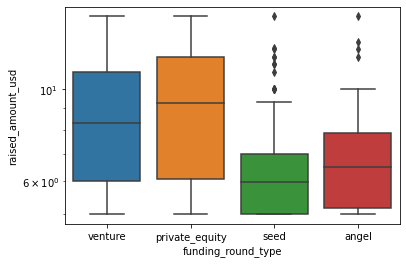

In [64]:
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=plotting_frame)
plt.yscale('log')
plt.show()

#### 2.A plot showing the top 9 countries against the total amount of investments of funding type FT.
#### This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

,raised_amount_usd
country_code,
USA,420068.029342
CHN,39338.918773
GBR,20072.813004
IND,14261.508718
CAN,9482.217668
FRA,7226.851352
ISR,6854.350477
DEU,6306.921981
JPN,3167.647127


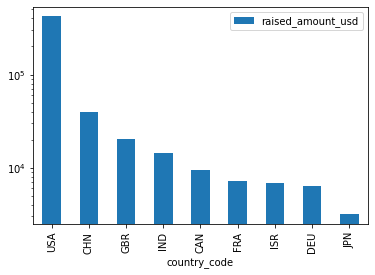

In [65]:
plotting = top9.set_index("country_code")
plotting.plot.bar(logy=True);
plotting

#### 3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).
#### This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.


In [66]:
D1_plot = D1

D1_plot = D1_plot.groupby("main_sector").raised_amount_usd.count().reset_index()
D1_plot.sort_values(["raised_amount_usd"], axis=0,ascending=False, inplace=True)
D1_plot = D1_plot.head(3)

In [67]:
D2_plot = D2

D2_plot = D2_plot.groupby("main_sector").raised_amount_usd.count().reset_index()
D2_plot.sort_values(["raised_amount_usd"], axis=0,ascending=False, inplace=True)
D2_plot = D2_plot.head(3)

In [68]:
D3_plot = D3

D3_plot = D3_plot.groupby("main_sector").raised_amount_usd.count().reset_index()
D3_plot.sort_values(["raised_amount_usd"], axis=0,ascending=False, inplace=True)
D3_plot = D3_plot.head(3)

In [69]:
D12 = pd.merge(D1_plot,D2_plot,how='outer',on='main_sector')
D123 = pd.merge(D12,D3_plot,how='outer',on='main_sector')

In [70]:
D123 = D123.rename(columns={"raised_amount_usd_X": "USD", "raised_amount_usd_Y": "GBP" ,"raised_amount_usd_Z": "INR"})
D123= D123.set_index("main_sector")
D123.fillna(0)

,raised_amount_usd_x,raised_amount_usd_y,raised_amount_usd
main_sector,,,
Others,2950.0,147.0,110.0
"Social, Finance, Analytics, Advertising",2714.0,133.0,60.0
Cleantech / Semiconductors,2300.0,128.0,0.0
"News, Search and Messaging",0.0,0.0,52.0


<AxesSubplot:>

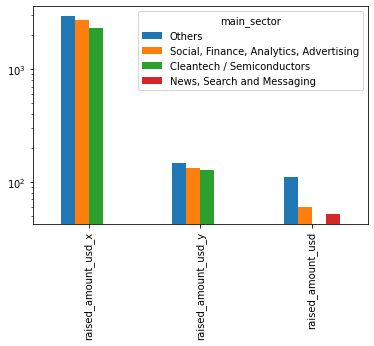

In [71]:
D123.T.plot.bar(logy=True)